In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import matplotlib
matplotlib.rc('ytick', labelsize=18)
matplotlib.rc('xtick', labelsize=18)

Using TensorFlow backend.


In [2]:
path_to_save = "../results/Figures/Supplemental Figure 2/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [3]:
pbmc = sc.read("../data/train_pbmc.h5ad")
pbmc

AnnData object with n_obs × n_vars = 16893 × 6998 
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [4]:
scgen_recon = sc.read("../data/reconstructed/scGen/pbmc.h5ad")
ctrl = scgen_recon[scgen_recon.obs["condition"] == "CD4T_ctrl"]
real_stim = scgen_recon[scgen_recon.obs["condition"] == "CD4T_real_stim"]
scgen_recon = scgen_recon[scgen_recon.obs["condition"].isin(["CD4T_real_stim", "CD4T_pred_stim", "CD4T_ctrl"])]
scgen_recon

View of AnnData object with n_obs × n_vars = 8001 × 6998 
    obs: 'batch', 'cell_type', 'condition'

In [5]:
cvae = sc.read("../data/reconstructed/CVAE/CVAE_CD4T.h5ad")

In [6]:
stgan = sc.read("../data/reconstructed/CGAN/cgan_cd4t.h5ad")

In [7]:
vecArith = sc.read("../data/reconstructed/VecArithm/VecArithm_CD4T.h5ad")

In [8]:
pca = sc.read("../data/reconstructed/PCAVecArithm/PCA_CD4T.h5ad")

In [9]:
cd4t = pbmc[pbmc.obs["cell_type"] == "CD4T"]
sc.tl.rank_genes_groups(cd4t, groupby="condition", n_genes=100, method="wilcoxon")
diff_genes = cd4t.uns["rank_genes_groups"]["names"]["stimulated"]

### Suppl. Figure 2.a

In [10]:
def make_plots(adata, conditions, model_name, figure, x_coeff=0.3, y_coeff=0.1):
    if model_name == "RealCD4T":
        mean_labels = {"x": "ctrl mean", "y": "stim mean"}
        var_labels = {"x": "ctrl var", "y": "stim var"}
    else:
        mean_labels = {"x": "pred mean", "y": "stim mean"}
        var_labels = {"x": "pred var", "y": "stim var"}
    scgen.plotting.reg_mean_plot(adata, 
                                 condition_key="condition",
                                 axis_keys={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                                 gene_list=diff_genes[:5],
                                 top_100_genes=diff_genes,
                                 path_to_save=os.path.join(path_to_save, f"SupplFig2{figure}_{model_name}_reg_mean.pdf"),
                                 legend=False,
                                 title="",
                                 labels=mean_labels,
                                 fontsize=26,
                                 textsize=18,
                                 x_coeff=x_coeff,
                                 y_coeff=y_coeff,
                                 show=True,
                                 range=[0, 5, 1])
    
    scgen.plotting.reg_var_plot(adata, 
                                condition_key="condition",
                                axis_keys={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                                gene_list=diff_genes[:5],
                                top_100_genes=diff_genes,
                                path_to_save=os.path.join(path_to_save, f"SupplFig2{figure}_{model_name}_reg_var.pdf"),
                                legend=False,
                                labels=var_labels,
                                title="",
                                fontsize=26,
                                textsize=18,
                                x_coeff=x_coeff,
                                y_coeff=y_coeff,
                                show=True)
    if model_name == "scGen":
        adata = adata[adata.obs["condition"].isin(["CD4T_ctrl", "CD4T_pred_stim", "CD4T_real_stim"])]
        adata.obs["condition"].replace("CD4T_ctrl", "ctrl", inplace=True)
        adata.obs["condition"].replace("CD4T_real_stim", "real_stim", inplace=True)
        adata.obs["condition"].replace("CD4T_pred_stim", "pred_stim", inplace=True)
    sc.pp.neighbors(adata, n_neighbors=20)
    sc.tl.umap(adata, min_dist=1.1)
    import matplotlib.style
    plt.style.use('default')
    if model_name == "scGen":
        sc.pl.umap(adata, color=["condition"],
                   legend_loc=False,
                   frameon=False,
                   title="",
                   palette=matplotlib.rcParams["axes.prop_cycle"],
                   save=f"_latent_conditions.png",
                   show=True)
    else:
        if model_name == "RealCD4T":
            sc.pl.umap(adata, color=["condition"],
                   legend_loc=False,
                   frameon=False,
                   title="",
                   palette=['#1f77b4', '#2ca02c'],
                   save=f"_latent_conditions.png",
                   show=True)
        else:
            
            sc.pl.umap(adata, color=["condition"],
                       legend_loc=False,
                       frameon=False,
                       title="",
                       palette=matplotlib.rcParams["axes.prop_cycle"],
                       save=f"_latent_conditions.png",
                       show=True)
    
    os.rename(src=os.path.join(path_to_save, "umap_latent_conditions.png"), 
              dst=os.path.join(path_to_save, f"SupplFig2{figure}_{model_name}_umap.png"))

0.9725512453489008
0.9713736215099451


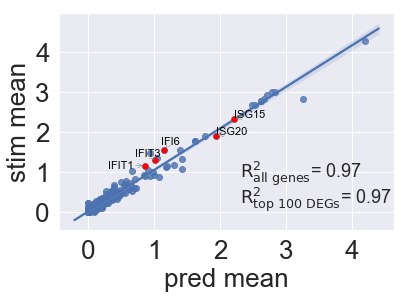

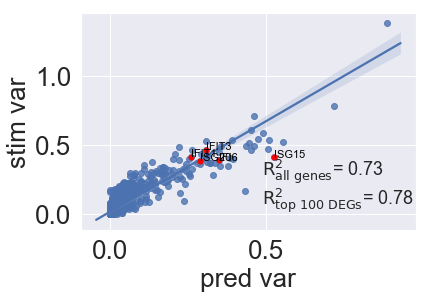

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'condition' as categorical


saving figure to file ../results/Figures/Supplemental Figure 2/umap_latent_conditions.png


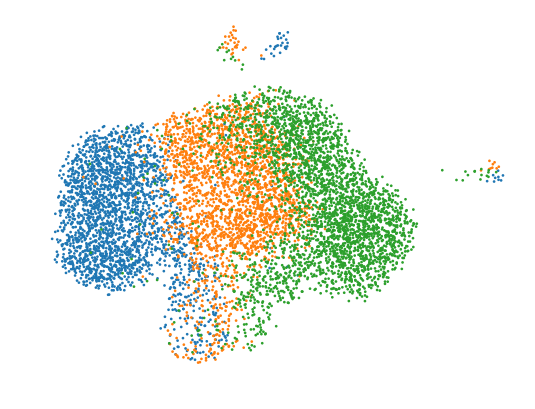

In [11]:
conditions = {"real_stim": "CD4T_real_stim", "pred_stim": "CD4T_pred_stim"}
make_plots(scgen_recon, conditions, "scGen", "a", 0.45, 0.8)

0.9528060589444511
0.9131664824256264


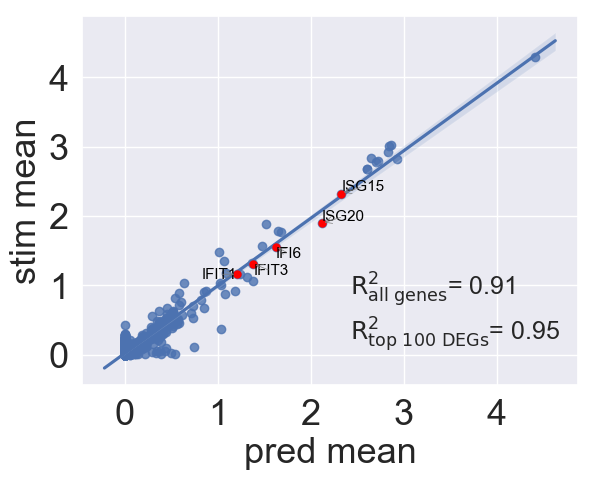

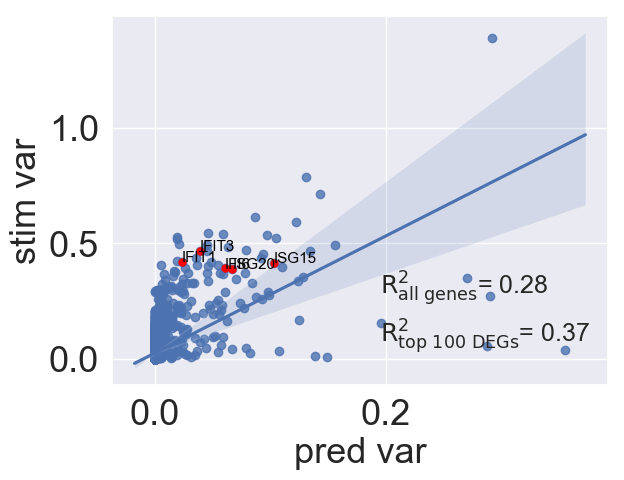

         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file ../results/Figures/Supplemental Figure 2/umap_latent_conditions.png


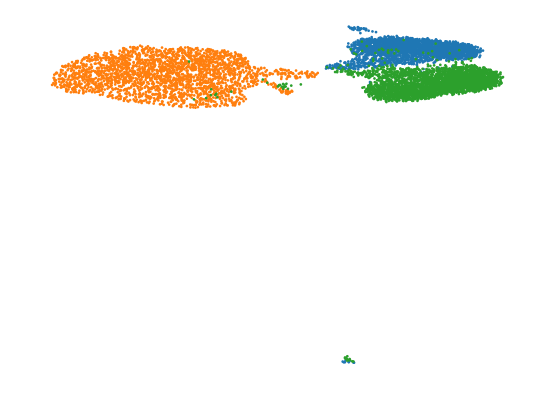

In [12]:
conditions = {"real_stim": "CD4T_real_stim", "pred_stim": "CD4T_pred_stim"}
make_plots(cvae, conditions, "CVAE", "b", 0.45, 0.8)

0.07746579582198962
0.1309775555118073


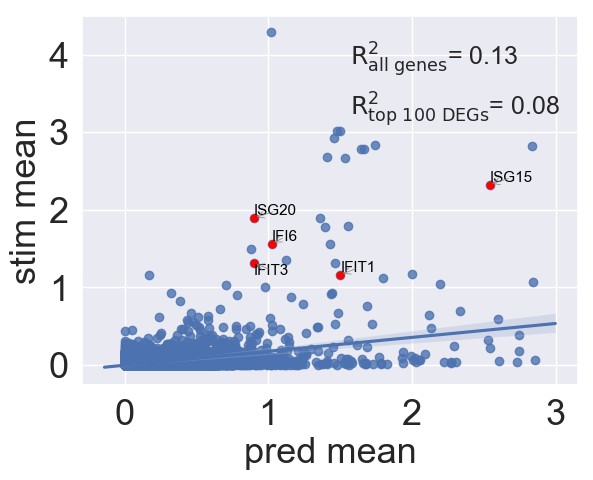

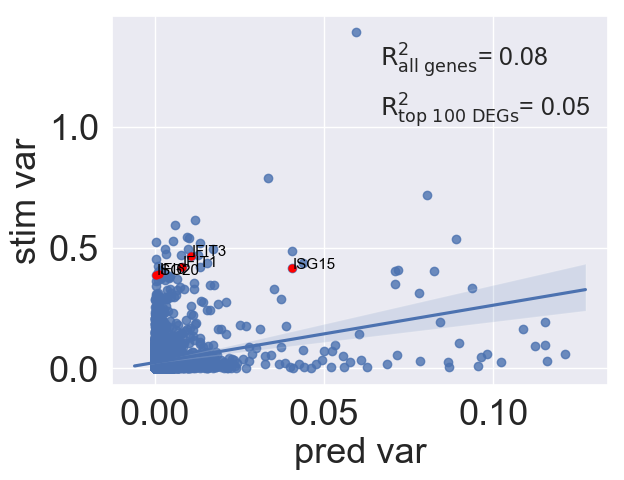

         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file ../results/Figures/Supplemental Figure 2/umap_latent_conditions.png


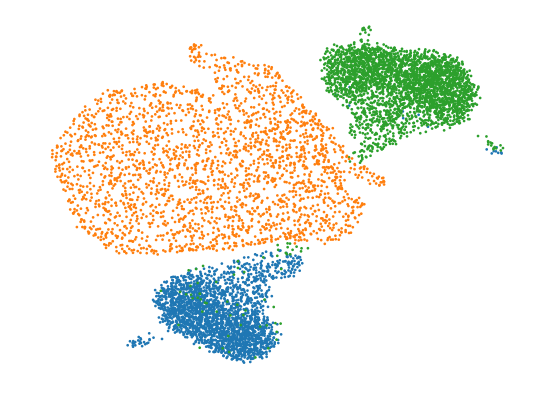

In [13]:
conditions = {"real_stim": "real_stim", "pred_stim": "pred_stim"}
make_plots(stgan, conditions, "Style Transfer GAN", "c", 0.45)

0.8085198949634407
0.895072261122612


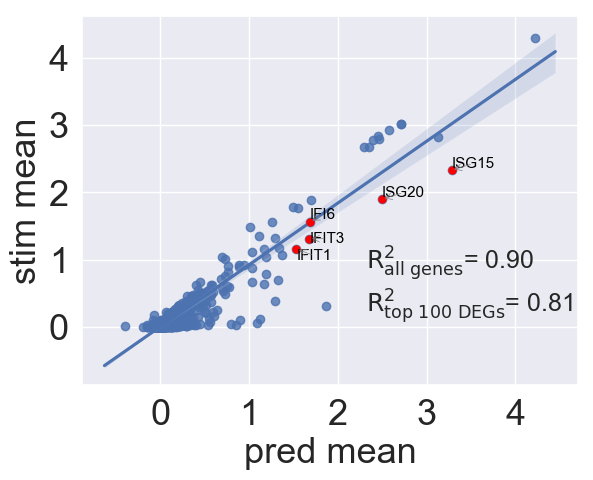

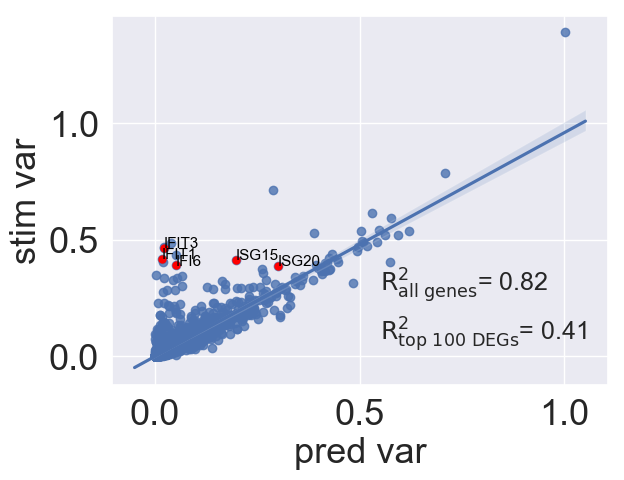

         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file ../results/Figures/Supplemental Figure 2/umap_latent_conditions.png


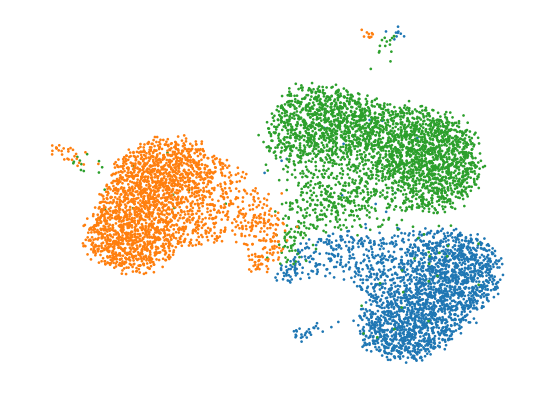

In [14]:
conditions = {"real_stim": "real_stim", "pred_stim": "pred_stim"}
make_plots(vecArith, conditions, "Vec. Arith.", "d", 0.45, 0.8)

0.8276182986622547
0.8993798983445852


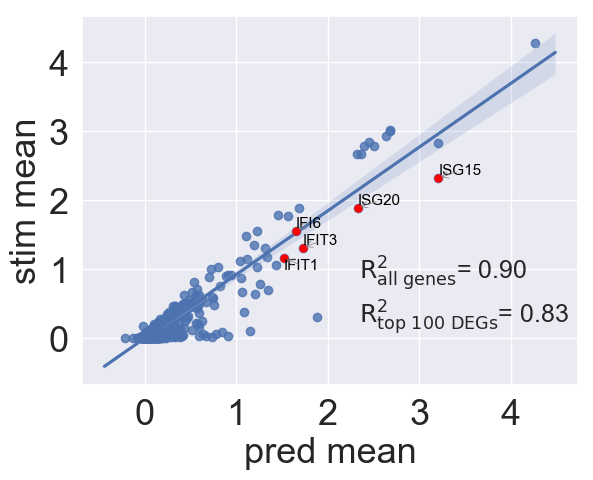

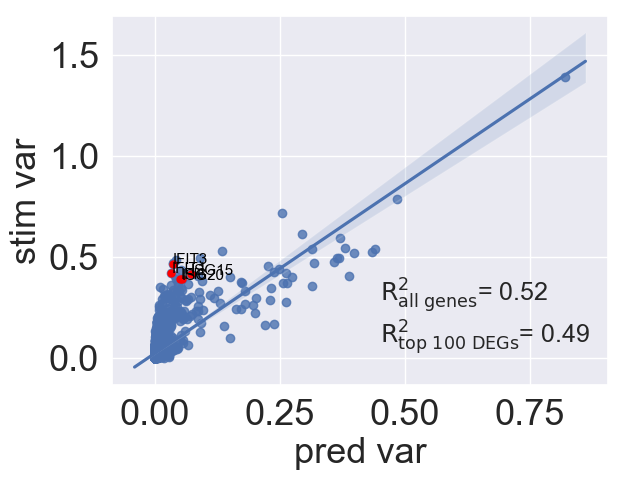

         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file ../results/Figures/Supplemental Figure 2/umap_latent_conditions.png


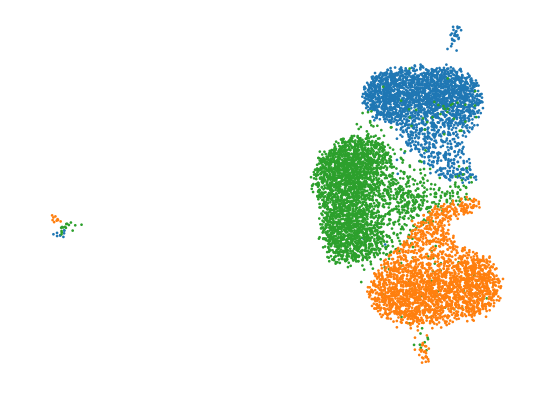

In [15]:
conditions = {"real_stim": "real_stim", "pred_stim": "pred_stim"}
make_plots(pca, conditions, "PCA + Vec. Arith.", "e", 0.45, 0.8)

0.6522499377540695
0.8672060003848523


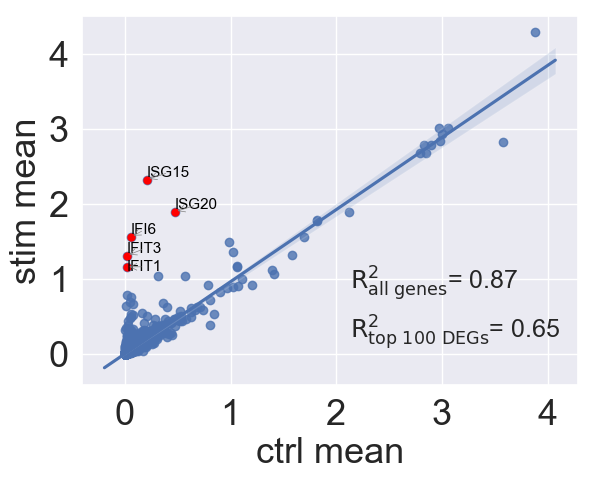

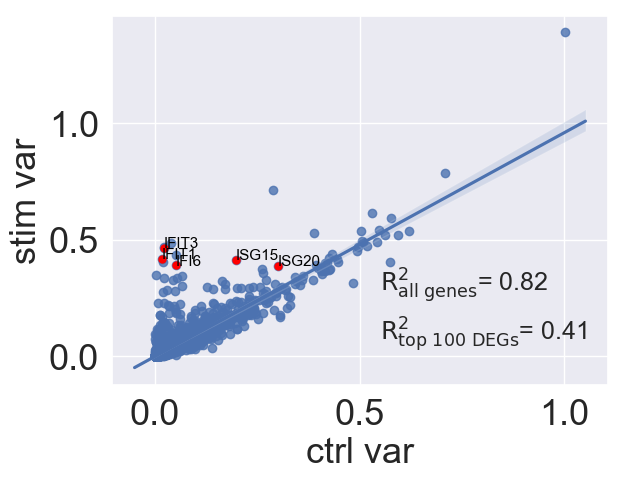

saving figure to file ../results/Figures/Supplemental Figure 2/umap_latent_conditions.png


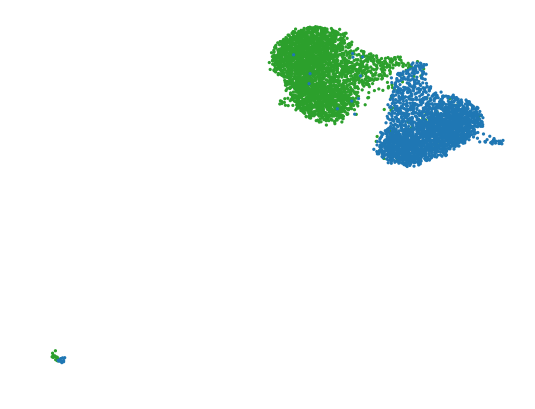

In [16]:
conditions = {"real_stim": "stimulated", "pred_stim": "control"}
pbmc_cd4t = pbmc[pbmc.obs["cell_type"] == "CD4T"]
make_plots(pbmc_cd4t, conditions, "RealCD4T", "f", 0.45, 0.8)